# Assignment 4
### Do three of four.

### Exercise 1: Contingent Comparisons
- Load the Minnesota use of force data.
- Bootstrap the proportion of missing values for `subject_injury` for each race, and plot the results with grouped KDE and ECDF plots
- Describe what you see. When we consider second order uncertainty, how similar or different are the sampling distributions of these proportions? 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
minnesota_df = pd.read_csv("data/mn_police_use_of_force.csv")
subset_df = minnesota_df[["subject_injury", "race"]]

In [5]:
subset_df["race"].value_counts()

race
Black                 7648
White                 3129
Native American        784
Other / Mixed Race     205
Asian                  129
Pacific Islander         6
Name: count, dtype: int64

In [6]:
bootstrap_df = pd.DataFrame(columns=["proportion", "race"])
##For each race
for race in subset_df["race"].unique():
    #get subframe of only that race
    current_df = subset_df[subset_df["race"] == race]
    n_bootstraps = 2500
    proportions = []
    #For each bootstrap
    for index in range(n_bootstraps):
        #Get a bootstrap sample
        bootstrap_sample = current_df.sample(frac=1.0, replace=True)
        #Calculate the proportion of missing values in subject_injury
        proportions.append(bootstrap_sample['subject_injury'].isna().sum()/len(bootstrap_sample))
    #Create new dataframe with a column containing the computed proportions and a column with the categorical race variable
    temp_df = pd.DataFrame(np.asarray([proportions, [race]*len(proportions)]).T, columns=["proportion", "race"])
    #Concatenate the new dataframe to the bootstrap_df for a complete dataframe to pass to seaborn.
    bootstrap_df = pd.concat([bootstrap_df, temp_df])
#Reset the index and ensure the proportion column is float
bootstrap_df.reset_index(drop=True, inplace=True)
bootstrap_df["proportion"] = bootstrap_df["proportion"].astype(float)

/var/folders/v4/nmf8gnpn5vb2t2vlt0df52mh0000gn/T/ipykernel_3483/1609998498.py:13: RuntimeWarning: invalid value encountered in scalar divide
  proportions.append(bootstrap_sample['subject_injury'].isna().sum()/len(bootstrap_sample))


Text(0, 0.5, 'Proportion of Data')

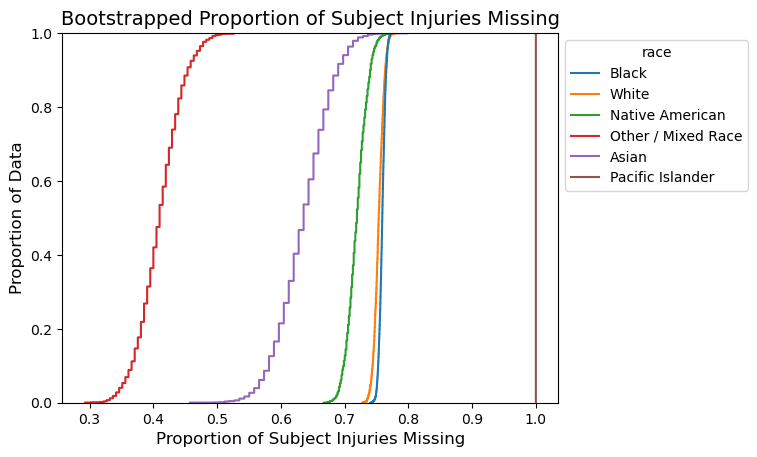

In [7]:

ax = sns.ecdfplot(data=bootstrap_df, x="proportion", hue="race")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Bootstrapped Proportion of Subject Injuries Missing", fontsize=14)
ax.set_xlabel("Proportion of Subject Injuries Missing", fontsize=12)
ax.set_ylabel("Proportion of Data", fontsize=12)

This plot shows there is widely varying distributions of missing values for each race. For example, "Pacific Islander" has 100% missing subject injury data. So, the ECDF (no matter what how many times you boot strap it) shows a single value of 1.0, resulting in a vertical line.

/var/folders/v4/nmf8gnpn5vb2t2vlt0df52mh0000gn/T/ipykernel_3483/1646729978.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(data=bootstrap_df, x="proportion", hue="race")


Text(0.5, 1.0, 'Bootstrapped KDE of Proportion of Subject Injuries Missing')

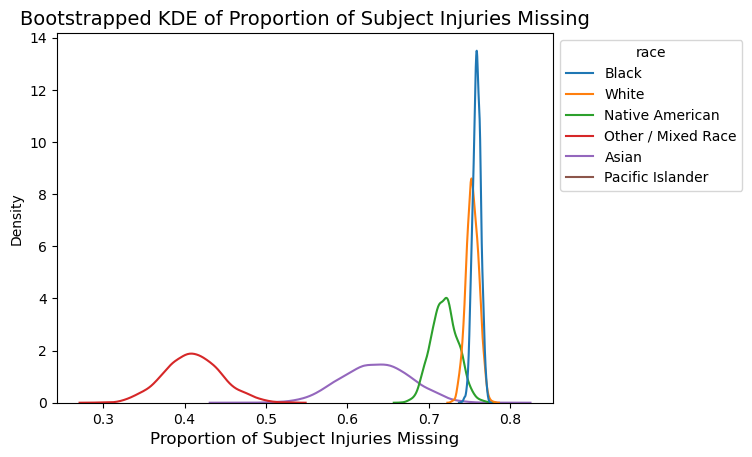

In [8]:
ax = sns.kdeplot(data=bootstrap_df, x="proportion", hue="race")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel("Proportion of Subject Injuries Missing", fontsize=12)
ax.set_title("Bootstrapped KDE of Proportion of Subject Injuries Missing", fontsize=14)

The graph above shows us the relative densities computed with a kernel. You can see that the distribution of densities above is quite extreme, given that "Other / Mised Race" has a wide distribution of proportions, and "Pacific Islander" (which isnt shown above, as there is only 1 value in the series, so SNS will not graph it) has a distribution of zero.

When we consider second order uncertainty, there will be a big difference between races. Our certainty that the bootstrapping estimates are representative for "Other / Mixed Race" will be much lower than our certainty the bootstrapping estimates are representative for "Black", as the distribution for missing values for "Black" is much lower.

In [ ]:
"""

Another option:

import pandas as pd
import numpy as np
import seaborn as sns

mn_df = pd.read_csv('./data/mn_police_use_of_force.csv')
mn_df['inj_na'] = mn_df['subject_injury'].isna()
mn_df['inj_na'] = mn_df['inj_na'].astype(int)
mn_df.head()

def bootstrap(x):
    estimates = [np.mean(x.sample(frac=1.0,replace=True)) for _ in range(1000)]
    return estimates

bootstrap_mn_data_dict = {}
for race in mn_df['race'].unique():
    given_race_df = mn_df[mn_df['race'] == race]['inj_na']
    bootstrap_by_race = bootstrap(given_race_df)
    bootstrap_mn_data_dict[race] = bootstrap_by_race

bootstrap_mn_df = pd.DataFrame(bootstrap_mn_data_dict)
bootstrap_mn_df

mn_ecdf = sns.ecdfplot(bootstrap_mn_df)
mn_ecdf.set_title("Bootstrapped Proportion of Subject Injuries Missing", fontsize=14)
mn_ecdf.set_xlabel("Proportion of Subject Injuries Missing", fontsize=12)
mn_ecdf.set_ylabel("Proportion of Data", fontsize=12)

mn_kde = sns.kdeplot(bootstrap_mn_df)
mn_kde.set_xlabel("Proportion of Subject Injuries Missing", fontsize=12)
mn_kde.set_title("Bootstrapped KDE of Proportion of Subject Injuries Missing", fontsize=14)


"""

'\n\nAnother option:\n\nimport pandas as pd\nimport numpy as np\nimport seaborn as sns\n\nmn_df = pd.read_csv(\'./data/mn_police_use_of_force.csv\')\nmn_df[\'inj_na\'] = mn_df[\'subject_injury\'].isna()\nmn_df[\'inj_na\'] = mn_df[\'inj_na\'].astype(int)\nmn_df.head()\n\ndef bootstrap(x):\n    estimates = [np.mean(x.sample(frac=1.0,replace=True)) for _ in range(1000)]\n    return estimates\n\nbootstrap_mn_data_dict = {}\nfor race in mn_df[\'race\'].unique():\n    given_race_df = mn_df[mn_df[\'race\'] == race][\'inj_na\']\n    bootstrap_by_race = bootstrap(given_race_df)\n    bootstrap_mn_data_dict[race] = bootstrap_by_race\n\nbootstrap_mn_df = pd.DataFrame(bootstrap_mn_data_dict)\nbootstrap_mn_df\n\nmn_ecdf = sns.ecdfplot(bootstrap_mn_df)\nmn_ecdf.set_title("Bootstrapped Proportion of Subject Injuries Missing", fontsize=14)\nmn_ecdf.set_xlabel("Proportion of Subject Injuries Missing", fontsize=12)\nmn_ecdf.set_ylabel("Proportion of Data", fontsize=12)\n\nmn_kde = sns.kdeplot(bootstrap_m

### Exercise 2: Invitation to Inference
- Run the simulation code line by line and comment what each line is doing, or write your own code to do the resampling
- Open the NHANES or Ames prices or College Completion data. Pick a variable and a statistic to compute (e.g. mean, median, variance, IQR)
- Use the `simulate` function from class to get a sample of estimates for your statistic and your data
- Create a new function, `interval(L,H,estimates)`, that computes the $L$-th and $H$-th quantiles for your estimates, $H>L$
- If $L=.05$ and $H=.95$, this is a **90-percent confidence interval**: "For our statistic, this interval captures the true value of the population parameter 90 percent of the time. (We are 90% **confident** that it includes the true value of the parameter, but the probability that the true parameter lies in this interval is 0 or 1.)"
- We will spend much more time on this later in class, but for people who have done hypothesis testing before, you now know how to do it directly from the data: No central limit theorem required.

In [9]:
## Our statistic to bootstrap:
def stat(x):
    stat = np.mean(x) # Take the mean of all the x values
    return stat # Return it
    
def simulate(var, df, fcn, S=1000, plot=True):
    ''' Bootstrap simulation code. '''    
    x = df[var] # Choose the column you want to analyze

    estimates = [] # Make an empty list
    for s in range(S):
        # Draw a new sample of same size as original, with replacement:
        x_s = x.sample(frac=1.0,replace=True)
        # Compute statistic(often the mean):
        stat_s = fcn(x_s)
        # Append estimate:
        estimates.append(stat_s)
    estimates = np.array(estimates) # Convert estimates list to numpy array

    ## or in one line, 
    #estimates = [fcn(x.sample(frac=1.0,replace=True)) for s in range(S)]
    #Make an array for estimates, run the function on the sample of x, the same size as x ,with replacement, do it S times

    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns
        sns.kdeplot(x, ax = axes[0]).set(title='KDE of Underlying Data') #Make a KDE plot of x using seaborn
        sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics') # Make a KDE plot of the estimates
        axes[1].axvline(x=fcn(x), color='orange', linestyle='--') # Add a vertical line at the mean
        sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics') # Make an ECDF plot of the estimates
        axes[2].axvline(x=fcn(x), color='orange', linestyle='--') # Add a vertical line at the mean
        plt.show()
        print(f'Variance of estimates is: {np.var(estimates)}') #Variance is the average of the squared differences from the mean
        
    return estimates

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

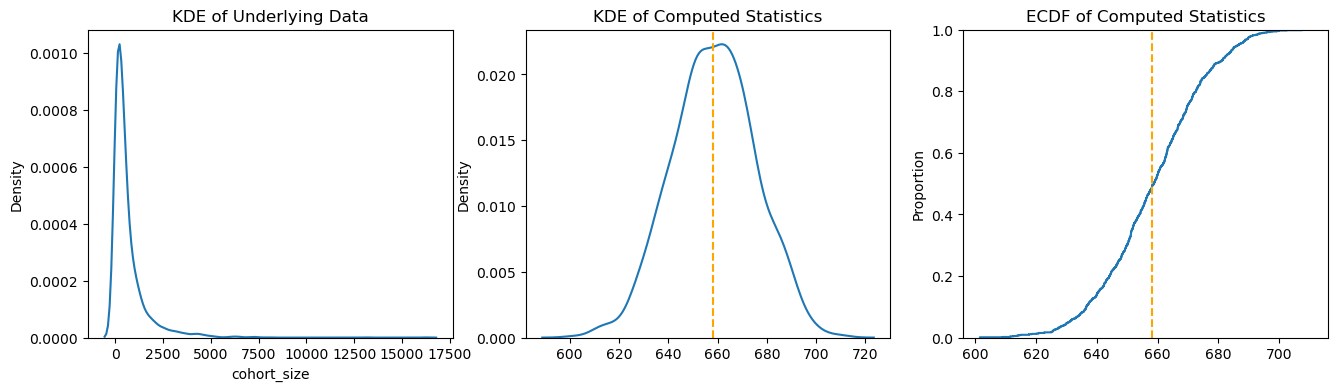

Variance of estimates is: 283.1543029949402


In [ ]:
# For Karina (e.g.): os.chdir(r'C:\Users\karina mehta\UVA class\UnderstandingUncertainity\git_practice\Understanding_Repo\data')

# competition_completions 
comp_df = pd.read_csv('./data/college_completion.csv')
# comp_df.head()

#Picking variable cohort size and stats as mean
estimates = simulate('cohort_size', comp_df, np.mean, S=1000, plot=True)

In [ ]:
#Creating function to calculate confidence interval
def interval(L,H,estimates):
    lower = np.quantile(estimates, L)
    upper = np.quantile(estimates, H)
    return lower, upper

interval(0.05, 0.95, estimates)

(np.float64(632.9703710580369), np.float64(685.1746386706197))

Our data ranges from 631 - 684 with 90% confidence. We are 90% confident that it includes the true value of the parameter, but the probability that the true parameter lies in this interval is 0 or 1.

### Exercise 3: Intro to A/B Testing
- Go here, and read about this study: https://www.clinicaltrials.gov/study/NCT01985360
- Read the Study Overview and explain what the goal of the trial is 
- Read the Study Plan and explain how it was designed and why -- there's lots of medical jargon, but the main point is how patients were assigned to interventions. 
- Read the Results Posted: Go to **Outcome Measures**. Explain how table 1 ("Incidence of Death from Any Cause or Myocardial Infarction") is a contingency table. These are the data for this exercise.
- What is the difference in surival rates between the invasive strategy and the conservative strategy?
- Bootstrap the survival rates for the two groups, and plot them as KDEs and ECDFs against one another
- Bootstrap the difference in surival rates, and plot it as a KDE and ECDF
- Is this an effective health intervention? Explain your answer clearly

This would be what CS people call **A/B testing** and everyone else called a **randomized controlled trial**: Using randomized assignment to detect the difference in outcomes between two groups. (We've just done a non-parametric version of a two-sample t-test.)

### 1. Goal of the Trial

The goal of the trial is to evaluate patient management strategies for those who have been diagnosed with Stable Ischemic (not caused by disease) Heart Disease or kidney disease patients.

The main goal within this objective was to test the effectiveness of invasive treatment versus noninvasive treatment. Effectiveness was measured by adverse outcomes including: 

1) Death or 

2) Myocardial infraction (non-fatal))of a specific invasive cardiac treatment for this disease. 

The researchers seemed to be motivated by measuring if invasive or non-invasive treatment was able to reduce unfavorable outcomes for those with this specific heart condition. Specifically, they want to explore whether this invasive, catheter-based treatment helps with mortality rate after 2.2 years as the primary aim. ne secondary aim is to compare death/hospitalization/heart attack/cardiac arrest go down because of this experimental procedure. Another secondary aim 
is to compare quality of life.

### 2. Study Plan

The researchers split patients into two groups; the control group was assigned the "Conserative Strategy" (CON) where this group's treatment included lifestyle changes and drug therapy. The experimental group included patients who recieved operational treatment such as a heart catheter, coronary bypass surgery, and percutaneous coronary intervention -- in addition to drug therapy and lifestyle changes. Patients were randomly assigned to either the treatment group (invasive) or control group (noninvasive). The conservative group is only for patients with optimal medical therapy failure (i.e, when the symptoms or disease get worse/can't be controlled).

For patients to be included in this study, the following inclusion criteria had to be met:

1) At least moderate ischemia on an exercise or pharmacologic stress test.

2) End-stage renal disease on dialysis or estimated glomerular filtration rate (eGFR) <30mL/min/1.73m².

3) Willingness to comply with all aspects of the protocol, including adherence to the assigned strategy, medical therapy and follow-up visits.

4) Willingness to give written informed consent.

5) Age ≥ 21 years.

### 3. Outcome Measures

Table 1 is a contingency table because the Incidence of Death can be represented as a binary categorical variable (Did the patient die after 2.2 years? "Yes" or "No"), which is contingent on the type of treatment (CON or INV). Visually, we can represent this with the Incendence of Death as the rows and treatment type as the columns. In other words, this shows the percent of subjects who fall into 2 categories.

### 4. Survival Rates

The difference in survival rates between the strategies is about 1.5%. The invasive strategy death rate was 31.7% while the conservative strategy death rate was 33.2%. This is based on the incidence of death from any cause OR myocardial infarction.

### 5. Bootstrapping

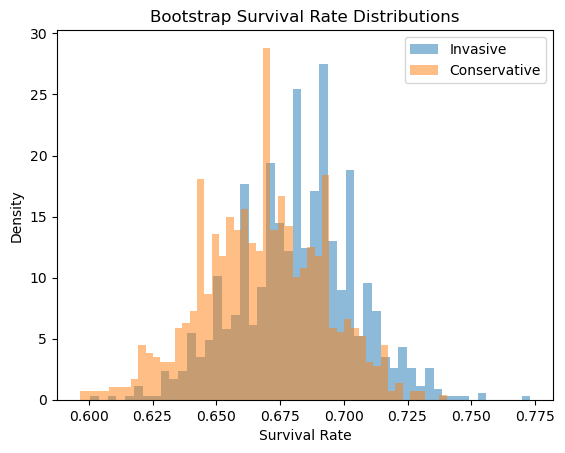

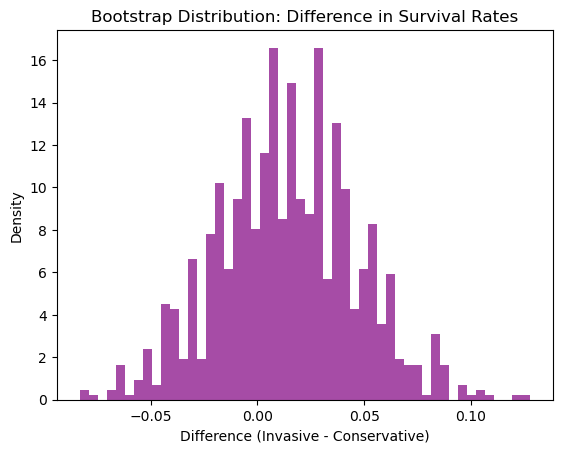

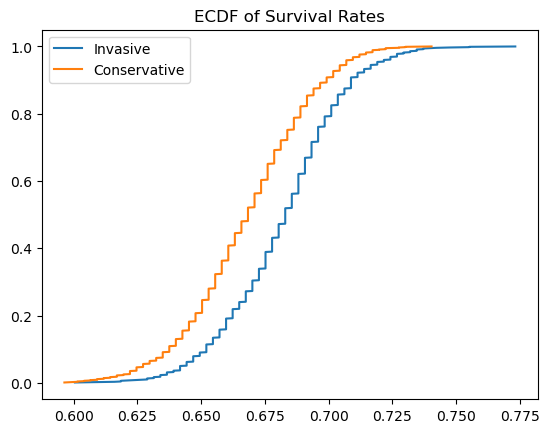

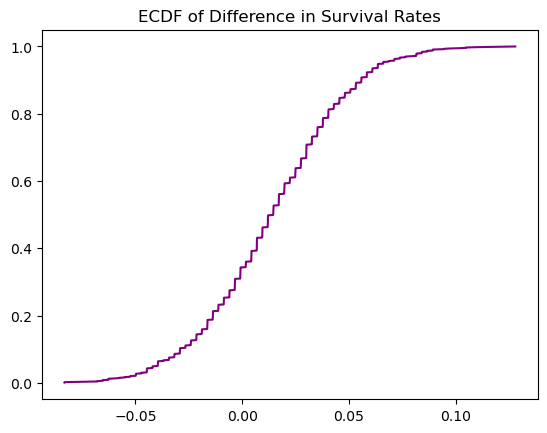

Mean difference: 0.014
95% CI: [-0.050, 0.082]


In [14]:
# Bootstrapping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_invasive = 388
n_invasive_deaths = 123
n_conservative = 389
n_conservative_deaths = 129

invasive_data = np.array([1]*n_invasive_deaths + [0]*(n_invasive - n_invasive_deaths))
conservative_data = np.array([1]*n_conservative_deaths + [0]*(n_conservative - n_conservative_deaths))

def bootstrap_survival(data, n_boot=1000): # 1000 so it runs on my computer CNK; MTA/HTM had 10000
    rates = []
    n = len(data)
    for _ in range(n_boot):
        sample = np.random.choice(data, size=n, replace=True)
        survival_rate = np.mean(sample == 0)
        rates.append(survival_rate)
    return np.array(rates)

    # Or in one line, rates = [np.mean(np.random.choice(size=len(data),replace=True)) for _ in range(10000)] ( I think)

boot_invasive = bootstrap_survival(invasive_data)
boot_conservative = bootstrap_survival(conservative_data)
boot_diff = boot_invasive - boot_conservative

plt.hist(boot_invasive, bins=50, alpha=0.5, density=True, label="Invasive")
plt.hist(boot_conservative, bins=50, alpha=0.5, density=True, label="Conservative")
plt.legend(); plt.title("Bootstrap Survival Rate Distributions")
plt.xlabel("Survival Rate"); plt.ylabel("Density")
plt.show()

plt.hist(boot_diff, bins=50, alpha=0.7, density=True, color="purple")
plt.title("Bootstrap Distribution: Difference in Survival Rates")
plt.xlabel("Difference (Invasive - Conservative)"); plt.ylabel("Density")
plt.show()


def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x, y



x1, y1 = ecdf(boot_invasive)
x2, y2 = ecdf(boot_conservative)
plt.plot(x1, y1, label="Invasive")
plt.plot(x2, y2, label="Conservative")
plt.legend(); plt.title("ECDF of Survival Rates")
plt.show()

x_diff, y_diff = ecdf(boot_diff)
plt.plot(x_diff, y_diff, color="purple")
plt.title("ECDF of Difference in Survival Rates")
plt.show()

ci_lower, ci_upper = np.percentile(boot_diff, [2.5, 97.5])
mean_diff = np.mean(boot_diff)
print(f"Mean difference: {mean_diff:.3f}")
print(f"95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]")

<Axes: title={'center': 'Bootstrapped Survival Rates'}, xlabel='Percent of Subjects Surviving', ylabel='Proportion of Data'>

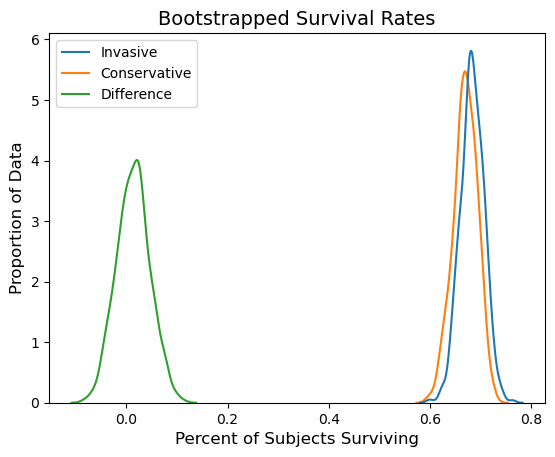

In [13]:
# Plotting KDE as well

bootstrap_invasive_data = {'Invasive': boot_invasive}
bootstrap_conservative_data = {'Conservative': boot_conservative}
bootstrap_diff = {'Difference': boot_diff}

bootstrap_invasive_df = pd.DataFrame(bootstrap_invasive_data)
bootstrap_conservative_df = pd.DataFrame(bootstrap_conservative_data)
bootstrap_diff_df = pd.DataFrame(bootstrap_diff)

heart_bootstrap_df = pd.concat([bootstrap_invasive_df, bootstrap_conservative_df, bootstrap_diff_df], axis=1)


def kde(data):
    return sns.kdeplot(data)


heart_kde = kde(heart_bootstrap_df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
heart_kde.set_title("Bootstrapped Survival Rates", fontsize=14)
heart_kde.set_xlabel("Percent of Subjects Surviving", fontsize=12)
heart_kde.set_ylabel("Proportion of Data", fontsize=12)
heart_kde

## 7. Findings

The bootstrap analysis shows:

•	Invasive strategy patients had a marginally higher survival rate (~1.5% difference on average).

•	The uncertainty interval crosses zero, so the effect is not statistically distinguishable from no effect.

•	The plots reinforce that the two groups’ survival distributions are highly overlapping.

From a bootstrap resampling perspective, this trial doesn’t demonstrate a meaningful survival advantage of the invasive strategy over the conservative one. That matches the trial’s published finding: invasive management did not improve survival in CKD patients with ischemia.

### Exercise 4: Prediction Uncertainty
- Pick a dataset and two continuous variables.
- Recall the LCLS estimator:
$$
\hat{y}(z) =  \frac{ \frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left( \frac{z - x_i}{h} \right)}{ \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k\left( \frac{z - x_i}{h} \right)}
$$
with the Epanechnikov kernel and the standard plug-in bandwidth for $h$
- Compute and plot this line for 30 bootstrap samples. Notice where there is a lot of variation in the predictions, versus little variation in the predictions.
- Now, for any $z$, we can bootstrap a distribution of predictions using the above formula. Do this at the 25th percentile, median, and 75th percentile of $X$, and make KDE plots of your results.
- Now, pick a grid for $z$: Obvious choices are all of the unique values in the data, or an equally spaced grid from the minimum value to the maximum value. For each $z$, bootstrap a sample of predictions and compute the .05 and .95 quantiles. Plot these error curves along with your LCLS estimate. Where are your predictions "tight"/reliable? Where are they highly variable/unreliable?

In [3]:
df_ames = pd.read_csv("./data/ames_prices.csv")

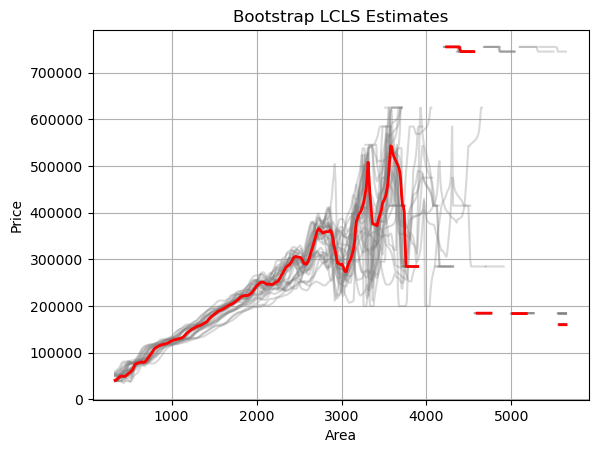

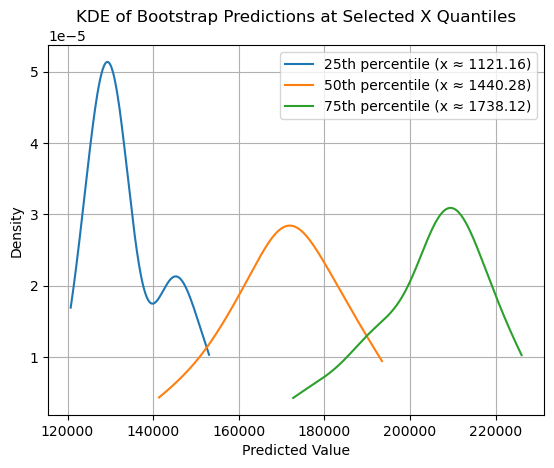

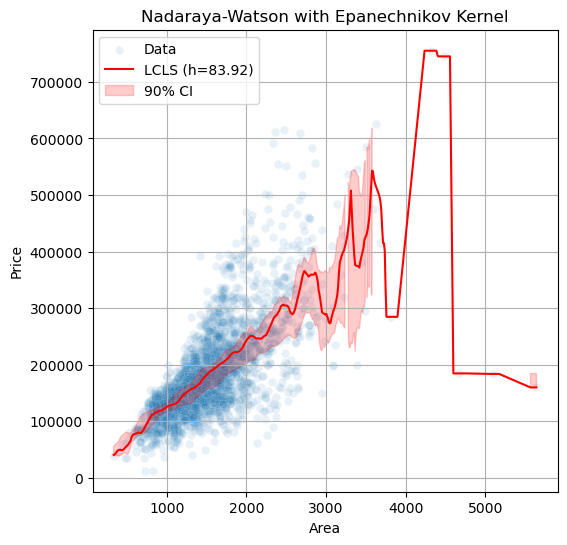

In [4]:
from scipy.stats import gaussian_kde
import warnings
warnings.filterwarnings("ignore")

class LCLSEstimator:
    """
    Implements the Local Constant Least Squares (Nadaraya-Watson) estimator.
    Uses the Epanechnikov kernel and plug-in bandwidth if not specified.
    """

    def __init__(self, x, y, h=None):
        self.x_name = x.name
        self.y_name = y.name

        df = pd.DataFrame({'x': x, 'y': y}).dropna()
        self.x = df['x']
        self.y = df['y']

        self.n = len(self.x)
        self.grid = np.linspace(self.x.min(), self.x.max(), 500)
        self.y_hat = None

        if h is None:
            iqr = np.quantile(self.x, 0.75) - np.quantile(self.x, 0.25)
            self.h = 0.9 * min(np.std(self.x), iqr / 1.34) * self.n ** (-1/5)
            #print(f'Computed bandwidth (Silverman\'s rule): {self.h}')
        else:
            self.h = h
            #print(f'Using provided bandwidth: {self.h}')

    def epanechnikov_kernel(self, u):
        return 0.75 * (1 - u**2) * (np.abs(u) <= 1)

    def fit(self):
        """
        Computes the LCLS estimator using the Epanechnikov kernel.
        """
        u = (self.grid.reshape(1, -1) - self.x.to_numpy().reshape(-1, 1)) / self.h
        K = self.epanechnikov_kernel(u)

        numerator = (self.y.to_numpy().reshape(-1, 1) * K).sum(axis=0)
        denominator = K.sum(axis=0)

        with np.errstate(divide='ignore', invalid='ignore'):
            self.y_hat = np.where(denominator != 0, numerator / denominator, np.nan)

        return self.y_hat, self.grid

    def plot(self, label=None, ci=None):
        """
        Plot data and fitted curve (optionally with confidence interval).
        """
        plt.figure(figsize=(6, 6))
        sns.scatterplot(x=self.x, y=self.y, alpha=0.1, label='Data')
        sns.lineplot(x=self.grid, y=self.y_hat, color='red',
                     label=label or f'LCLS (h={self.h:.2f})')

        if ci is not None:
            lower, upper = ci
            plt.fill_between(self.grid, lower, upper, color='red', alpha=0.2, label='90% CI')

        plt.xlabel(self.x_name.capitalize())
        plt.ylabel(self.y_name.capitalize())
        plt.title('Nadaraya-Watson with Epanechnikov Kernel')
        plt.legend()
        plt.grid(True)
        plt.show()

    def bootstrap(self, n_bootstrap=30, seed=42, show_curves=True):
        """
        Perform bootstrap to estimate prediction uncertainty.
        - Returns list of y_hat curves.
        """
        np.random.seed(seed)
        bootstrap_curves = []

        for _ in range(n_bootstrap):
            idx = np.random.choice(self.n, self.n, replace=True)
            x_sample = self.x.iloc[idx].reset_index(drop=True)
            y_sample = self.y.iloc[idx].reset_index(drop=True)

            model = LCLSEstimator(x_sample, y_sample, h=self.h)
            y_hat_sample, _ = model.fit()
            bootstrap_curves.append(y_hat_sample)

            if show_curves:
                plt.plot(self.grid, y_hat_sample, color='gray', alpha=0.3)

        if show_curves:
            plt.plot(self.grid, self.y_hat, color='red', label='Original Fit', linewidth=2)
            plt.xlabel(self.x_name.capitalize())
            plt.ylabel(self.y_name.capitalize())
            plt.title('Bootstrap LCLS Estimates')
            plt.grid(True)
            plt.show()

        return np.array(bootstrap_curves)

    def kde_at_points(self, bootstrap_curves, quantiles=[0.25, 0.5, 0.75]):
        """
        For selected quantiles of X, plot KDE of bootstrapped predictions.
        """
        quantile_vals = np.quantile(self.x, quantiles)
        indices = [np.abs(self.grid - q).argmin() for q in quantile_vals]

        for i, q in zip(indices, quantiles):
            samples = bootstrap_curves[:, i]
            kde = gaussian_kde(samples)
            x_vals = np.linspace(min(samples), max(samples), 200)
            plt.plot(x_vals, kde(x_vals), label=f'{int(q*100)}th percentile (x ≈ {self.grid[i]:.2f})')

        plt.title('KDE of Bootstrap Predictions at Selected X Quantiles')
        plt.xlabel('Predicted Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_with_confidence_band(self, bootstrap_curves):
        """
        Plot the original fit along with 90% CI (5th and 95th percentiles from bootstrap).
        """
        lower = np.percentile(bootstrap_curves, 5, axis=0)
        upper = np.percentile(bootstrap_curves, 95, axis=0)
        self.plot(ci=(lower, upper))


# === USAGE ===

# Assume df2 is already defined
x = df_ames['area']
y = df_ames['price']

# Instantiate model
model = LCLSEstimator(x, y)
model.fit()

# Bootstrap
bootstrap_curves = model.bootstrap(n_bootstrap=30)

# KDE at 25%, 50%, 75% quantiles of X
model.kde_at_points(bootstrap_curves)

# Plot with 90% confidence interval
model.plot_with_confidence_band(bootstrap_curves)

Plot 1: Bootstrap LCLS Estimates

The spread of gray lines around the red line reflects uncertainty in the model’s predictions.

For smaller area values, the fits are tighter and more consistent.

For larger area values (especially beyond ~3500), the fits become erratic due to sparse data, leading to high variability.

Plot 2: KDE of Bootstrap Predictions at Selected X Quantiles

Distributions are smooth and unimodal at each quantile.

Spread decreases slightly as Area increases, suggesting slightly higher model stability in the mid-range.

Provides insight into prediction uncertainty at specific points along the Area axis.

Plot 3: Nadaraya-Watson with Epanechnikov Kernel and 90% Confidence Interval

The CI band is narrowest in the mid-range of the data where the density of points is highest.

CI widens at the tails, especially beyond Area > 3500, reflecting model uncertainty due to data sparsity.

The model appears to capture the main trend in the data but behaves erratically in sparse regions.